In [4]:
import pandas as pd
import requests
from io import StringIO

sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(sp500_url, headers=header)

# Get table 1 (the S&P 500 companies list)
all_tables = pd.read_html(StringIO(r.text))
data_table = all_tables[1]

print(f"Total S&P 500 companies: {len(data_table)}")
print(data_table.head())

Total S&P 500 companies: 503
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [5]:
data_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [6]:
import yfinance as yf
!pip install yahoofinancials
from yahoofinancials import YahooFinancials
from datetime import datetime
# Define a start date and End Date
start = '2022-01-01'
end = '2025-01-01'
## Read Stock Price Data (Eg Apple Stock Price)
Data_stock_price = yf.download(data_table['Symbol'].values.tolist(), start= start, end= end)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38618 sha256=1928bcad5d92df7a1c280f09f9347e7d77da119b1563e9c972b41744a4b382a4
  Stored in directory: /root/.cache/pip/wheels/b0/e1/ca/e683b02e57db550881c8ebb89ba3eccb7a5c0ebfad7f03acea
Successfully built yahoofinancials


/tmp/ipython-input-724621932.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Data_stock_price = yf.download(data_table['Symbol'].values.tolist(), start= start, end= end)
[**********************65%******                 ]  325 of 503 completedERROR:yfinance:Failed to get ticker 'CTRA' reason: Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[**********************70%*********              ]  350 of 503 completedERROR:yfinance:Failed to get ticker 'ADP' reason: Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[**********************72%**********             ]  362 of 503 completedERROR:yfinance:Failed to get ticker 'HBAN' reason: Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.

In [7]:
import pandas as pd

close_prices = Data_stock_price['Close']

missing_all = close_prices.columns[close_prices.isnull().all()].tolist()

missing_percent = (close_prices.isnull().sum() / len(close_prices)) * 100
missing_partial = missing_percent[missing_percent > 20].index.tolist()

invalid_stocks = list(set(missing_all + missing_partial))

all_stocks = data_table['Symbol'].values.tolist()
valid_stocks = [s for s in all_stocks if s not in invalid_stocks]

invalid_df = pd.DataFrame({
    'Stock': invalid_stocks,
    'Reason': ['No data available'] * len(invalid_stocks)
})

print(invalid_df)
print(f"\nTotal stocks: {len(all_stocks)}")
print(f"Invalid removed: {len(invalid_stocks)}")
print(f"Valid stocks: {len(valid_stocks)}")

    Stock             Reason
0    HBAN  No data available
1    GEHC  No data available
2    SOLV  No data available
3     GEV  No data available
4   BRK.B  No data available
5     ADP  No data available
6    SOLS  No data available
7     XYZ  No data available
8    KVUE  No data available
9    VLTO  No data available
10   BF.B  No data available
11      Q  No data available

Total stocks: 503
Invalid removed: 12
Valid stocks: 491


In [8]:
Data_stock_price

Price      Adj Close                                    Close              \
Ticker           ADP BF.B BRK.B HBAN   Q SOLS XYZ           A        AAPL   
Date                                                                        
2022-01-03       NaN  NaN   NaN  NaN NaN  NaN NaN  152.320023  178.270294   
2022-01-04       NaN  NaN   NaN  NaN NaN  NaN NaN  147.170654  176.007797   
2022-01-05       NaN  NaN   NaN  NaN NaN  NaN NaN  144.649551  171.325989   
2022-01-06       NaN  NaN   NaN  NaN NaN  NaN NaN  145.155701  168.465988   
2022-01-07       NaN  NaN   NaN  NaN NaN  NaN NaN  141.291214  168.632477   
...              ...  ...   ...  ...  ..  ...  ..         ...         ...   
2024-12-24       NaN  NaN   NaN  NaN NaN  NaN NaN  135.004929  257.037506   
2024-12-26       NaN  NaN   NaN  NaN NaN  NaN NaN  134.737091  257.853760   
2024-12-27       NaN  NaN   NaN  NaN NaN  NaN NaN  134.449417  254.439224   
2024-12-30       NaN  NaN   NaN  NaN NaN  NaN NaN  133.338440  251.064484   
2024-12-31       NaN  NaN   NaN  NaN NaN  NaN NaN  133.505386  249.292496   

Price                   ...   Volume                                           \
Ticker            ABBV  ...       WY     WYNN      XEL       XOM      XYL XYZ   
Date                    ...                                                     
2022-01-03  116.779289  ...  3831100  2437800  3501100  24282400   759100 NaN   
2022-01-04  116.555092  ...  3089700  2292300  4197000  38584000   925400 NaN   
2022-01-05  117.167358  ...  3737600  3439900  4166000  34033300  1090200 NaN   
2022-01-06  116.615448  ...  3315200  2583200  2296000  30668500   703400 NaN   
2022-01-07  116.313629  ...  3309900  1720400  2673100  23985400   765000 NaN   
...                ...  ...      ...      ...      ...       ...      ...  ..   
2024-12-24  173.918808  ...  1780100   692800   943900   7807000   379300 NaN   
2024-12-26  173.145844  ...  1736500  1218900  1394900   9652400   575700 NaN   
2024-12-27  171.996048  ...  2320500  1086700  2015000  11943900   552400 NaN   
2024-12-30  170.247192  ...  2914700  2180100  2642900  11080800   586800 NaN   
2024-12-31  171.696503  ...  3125200  1612600  2143800  12387800   641600 NaN   

Price                                          
Ticker          YUM      ZBH    ZBRA      ZTS  
Date                                           
2022-01-03  1251400  1184809  272600  2772700  
2022-01-04   935900  1400800  346000  4664000  
2022-01-05   977900  1895715  403700  4749400  
2022-01-06   862400  1088813  338300  3103400  
2022-01-07   833700  1690230  432800  2206500  
...             ...      ...     ...      ...  
2024-12-24   533000   458600   88700  1023600  
2024-12-26  1040900  1277300  140100  2167200  
2024-12-27  1146300   743400  287200  1800100  
2024-12-30  1144600  1532000  211300  1531400  
2024-12-31  1217100   683300  327900  1327400  

[753 rows x 2522 columns]

In [9]:
# Calculate the daily returns and annual volatility of the stock
import math
daily_returns = Data_stock_price['Close'].pct_change()
annual_volatility = daily_returns.std() * math.sqrt(252)

/tmp/ipython-input-763340254.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = Data_stock_price['Close'].pct_change()


In [10]:
daily_returns

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.033806,-0.012691,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,0.018559,...,0.012817,-0.003190,0.006329,0.037614,0.010608,NaN,0.005347,0.010145,0.006337,-0.038072
2022-01-05,-0.017130,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,-0.007809,...,-0.024824,-0.037033,0.009800,0.012437,-0.013629,NaN,-0.012677,-0.003297,-0.050068,-0.038024
2022-01-06,0.003499,-0.016693,-0.004710,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,0.008891,...,0.007986,0.004629,-0.007821,0.023520,-0.001373,NaN,0.010331,-0.008307,-0.005410,0.003971
2022-01-07,-0.026623,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026242,0.008524,...,-0.001238,-0.001063,0.008759,0.008197,-0.007992,NaN,-0.011467,-0.006050,-0.043771,-0.029114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011144,0.011478,0.009025,0.003494,0.003937,0.006298,0.007972,0.002686,0.014891,0.004364,...,0.006410,0.007604,0.007236,0.000941,0.005446,NaN,0.008516,0.004494,0.012262,0.002557
2024-12-26,-0.001984,0.003176,-0.004444,0.002445,0.004444,0.002806,-0.003318,0.004956,-0.000137,-0.000395,...,-0.003185,0.005970,-0.000440,0.000846,0.002708,NaN,0.007407,-0.000466,0.003566,0.004979
2024-12-27,-0.002135,-0.013242,-0.006641,-0.014300,-0.002429,-0.006349,-0.011792,-0.008175,-0.004907,-0.000593,...,-0.006390,-0.007054,-0.000587,-0.000094,-0.007934,NaN,-0.005662,-0.003543,-0.019604,-0.005558


In [11]:
annual_volatility

,0
Ticker,
A,0.296259
AAPL,0.270935
ABBV,0.219958
ABNB,0.467875
ABT,0.217839
...,...
XYZ,NaN
YUM,0.191335
ZBH,0.245157


In [12]:
import yfinance as yf
import pandas as pd

# Initiate the function
def calculate_betas(markets, stocks, start_date, end_date):
    """Calculate beta values for stocks relative to market index"""

    print(f"Downloading market data for {markets}...")
    # Download the historical data for the index/market
    market = yf.download(markets, start_date, end_date, progress=False)  # Added progress=False
    market['stock_name'] = markets

    # Calculate daily returns
    market['daily_return'] = market['Close'].pct_change(1)

    # Calculate standard deviation of the returns
    market_std = market['daily_return'].std()
    market.dropna(inplace=True)
    market = market[['Close', 'stock_name', 'daily_return']]

    print(f"Market data downloaded. Market std: {market_std:.6f}")

    # Download the historical data for each stock and calculate its standard deviation
    # Using for loops/iteration
    frames = []
    stds = []
    stock_names = []
    failed_stocks = []

    print(f"\nDownloading data for {len(stocks)} stocks...")

    for idx, i in enumerate(stocks, 1):
        try:
            # Print progress every 10 stocks
            if idx % 10 == 0 or idx == 1:
                print(f"  Processing stock {idx}/{len(stocks)}: {i}")

            data = yf.download(i, start_date, end_date, progress=False)

            if data.empty:
                failed_stocks.append(i)
                continue

            data['stock_name'] = i
            data['daily_return'] = data['Close'].pct_change(1)
            data.dropna(inplace=True)
            data = data[['Close', 'stock_name', 'daily_return']]
            data_std = data['daily_return'].std()

            frames.append(data)
            stds.append(data_std)
            stock_names.append(i)

        except Exception as e:
            failed_stocks.append(i)
            continue

    print(f"\n✓ Successfully downloaded: {len(frames)} stocks")
    print(f"✗ Failed/Empty: {len(failed_stocks)} stocks")

    # For each stock calculate its correlation with index/market
    print("\nCalculating correlations and betas...")
    stock_correlation = []

    for i in frames:
        correlation = i['daily_return'].corr(market['daily_return'])
        stock_correlation.append(correlation)

    # Calculate beta
    betas = []
    for b, i in zip(stock_correlation, stds):
        beta_calc = b * (i / market_std)
        betas.append(beta_calc)

    # Form dataframe with the results
    dictionary = {stock_names[e]: betas[e] for e in range(len(stock_names))}
    dataframe = pd.DataFrame([dictionary]).T
    dataframe.reset_index(inplace=True)
    dataframe.rename(columns={"index": "Stock_Name", 0: "Beta"}, inplace=True)

    print(f"\n✓ Beta calculation complete!")
    print(f"Total stocks with beta values: {len(dataframe)}")

    return dataframe


# Run the function using valid stocks
print("="*80)
print("CALCULATING BETA VALUES FOR S&P 500 STOCKS")
print("="*80)

beta_df = calculate_betas('^GSPC', valid_stocks, '2022-01-01', '2025-01-01')

# Display results
print("\n" + "="*80)
print("BETA CALCULATION RESULTS")
print("="*80)
print(f"\nFirst 10 stocks:")
print(beta_df.head(10))

print(f"\nBeta Statistics:")
print(beta_df['Beta'].describe())

print(f"\nStocks with Beta > 1.5 (High volatility):")
print(beta_df[beta_df['Beta'] > 1.5].sort_values('Beta', ascending=False))

print(f"\nStocks with Beta < 0.5 (Low volatility):")
print(beta_df[beta_df['Beta'] < 0.5].sort_values('Beta'))

CALCULATING BETA VALUES FOR S&P 500 STOCKS


/tmp/ipython-input-3123303085.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(markets, start_date, end_date, progress=False)  # Added progress=False


Market data downloaded. Market std: 0.011023

  Processing stock 1/491: MMM


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 10/491: A


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 20/491: GOOGL


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 30/491: AWK


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 40/491: AMAT


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 50/491: ADSK


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 60/491: BBY


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 70/491: AVGO


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 80/491: COF


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 90/491: CNP


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 100/491: CINF


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 110/491: COIN


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 120/491: GLW


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 130/491: CVS


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 140/491: DVN


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 150/491: DOW


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 160/491: EA


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 170/491: EQR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 180/491: EXPD


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 190/491: FITB


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 200/491: FCX


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 210/491: GILD


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 220/491: HSIC


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 230/491: HPQ


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 240/491: PODD


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 250/491: INVH


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 260/491: K


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 270/491: KR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 280/491: LIN


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 290/491: MAR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 300/491: MRK


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 310/491: MHK


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 320/491: MSCI


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 330/491: NDSN


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 340/491: ORLY


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 350/491: PLTR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 360/491: PCG


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 370/491: PGR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 380/491: RL


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 390/491: HOOD


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 400/491: STX


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 410/491: LUV


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 420/491: SYY


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 430/491: TSLA


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 440/491: TDG


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 450/491: UNP


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 460/491: VZ


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 470/491: WMT


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 480/491: WY


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 490/491: ZBH


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)



✓ Successfully downloaded: 491 stocks
✗ Failed/Empty: 0 stocks

Calculating correlations and betas...

✓ Beta calculation complete!
Total stocks with beta values: 491

BETA CALCULATION RESULTS

First 10 stocks:
  Stock_Name      Beta
0        MMM  0.783736
1        AOS  0.924451
2        ABT  0.672317
3       ABBV  0.299097
4        ACN  1.094207
5       ADBE  1.447974
6        AMD  2.064749
7        AES  1.015896
8        AFL  0.607779
9          A  1.024801

Beta Statistics:
count    491.000000
mean       0.930646
std        0.412818
min        0.108993
25%        0.622077
50%        0.905681
75%        1.147939
max        2.960959
Name: Beta, dtype: float64

Stocks with Beta > 1.5 (High volatility):
    Stock_Name      Beta
109       COIN  2.960959
336       NVDA  2.268516
40         APP  2.261933
436        TTD  2.237123
349       PLTR  2.189588
313       MPWR  2.134131
6          AMD  2.064749
147       DASH  2.004918
389       HOOD  1.984828
343         ON  1.966556
81         C

In [13]:
beta_df

,Stock_Name,Beta
0,MMM,0.783736
1,AOS,0.924451
2,ABT,0.672317
3,ABBV,0.299097
4,ACN,1.094207
...,...,...
486,XYL,1.067702
487,YUM,0.633410
488,ZBRA,1.500189
489,ZBH,0.736503


In [14]:
beta_df = calculate_betas('^GSPC', valid_stocks, '2022-01-01', '2025-01-01')

Market data downloaded. Market std: 0.011023

  Processing stock 1/491: MMM


/tmp/ipython-input-3123303085.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(markets, start_date, end_date, progress=False)  # Added progress=False
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argum

  Processing stock 10/491: A


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 20/491: GOOGL


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 30/491: AWK


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 40/491: AMAT


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 50/491: ADSK


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 60/491: BBY


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 70/491: AVGO


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 80/491: COF


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 90/491: CNP


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 100/491: CINF


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 110/491: COIN


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 120/491: GLW


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 130/491: CVS


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 140/491: DVN


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 150/491: DOW


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 160/491: EA


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 170/491: EQR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 180/491: EXPD


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 190/491: FITB


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 200/491: FCX


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 210/491: GILD


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 220/491: HSIC


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 230/491: HPQ


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 240/491: PODD


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 250/491: INVH


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 260/491: K


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 270/491: KR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 280/491: LIN


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 290/491: MAR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 300/491: MRK


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 310/491: MHK


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 320/491: MSCI


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 330/491: NDSN


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 340/491: ORLY


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 350/491: PLTR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 360/491: PCG


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 370/491: PGR


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PGR']: Timeout('Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has c

  Processing stock 380/491: RL


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 390/491: HOOD


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 400/491: STX


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 410/491: LUV


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 420/491: SYY


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TROW']: Timeout('Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has 

  Processing stock 430/491: TSLA


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 440/491: TDG


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 450/491: UNP


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 460/491: VZ


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 470/491: WMT


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 480/491: WY


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)
/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True


  Processing stock 490/491: ZBH


/tmp/ipython-input-3123303085.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date, progress=False)



✓ Successfully downloaded: 489 stocks
✗ Failed/Empty: 2 stocks

Calculating correlations and betas...

✓ Beta calculation complete!
Total stocks with beta values: 489


In [23]:
# Create df_metrics
df_metrics = beta_df.copy()
df_metrics.rename(columns={'Stock_Name': 'Ticker'}, inplace=True)
df_metrics['Annual_Volatility'] = df_metrics['Ticker'].map(annual_volatility.to_dict())
df_metrics['Daily_Return'] = df_metrics['Ticker'].map(daily_returns.mean())
df_metrics = df_metrics.dropna()

print(f"df_metrics created: {len(df_metrics)} stocks")
print(df_metrics.head())

df_metrics created: 489 stocks
  Ticker      Beta  Annual_Volatility  Daily_Return
0    MMM  0.783736           0.295654      0.000160
1    AOS  0.924451           0.278673     -0.000047
2    ABT  0.672317           0.217839     -0.000106
3   ABBV  0.299097           0.219958      0.000610
4    ACN  1.094207           0.270331      0.000011


In [15]:
beta_df

,Stock_Name,Beta
0,MMM,0.783736
1,AOS,0.924451
2,ABT,0.672317
3,ABBV,0.299097
4,ACN,1.094207
...,...,...
484,XYL,1.067702
485,YUM,0.633410
486,ZBRA,1.500189
487,ZBH,0.736503


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [25]:
df_clean = df_metrics.dropna(subset=['Beta']).copy()

Q1 = df_clean['Beta'].quantile(0.25)
Q3 = df_clean['Beta'].quantile(0.75)

In [27]:
from sklearn.preprocessing import StandardScaler

# Scale the Beta feature for clustering
X = df_clean[['Beta']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled data shape: {X_scaled.shape}")

Scaled data shape: (489, 1)


Linkage matrix expects 489 labels
We have 489 tickers


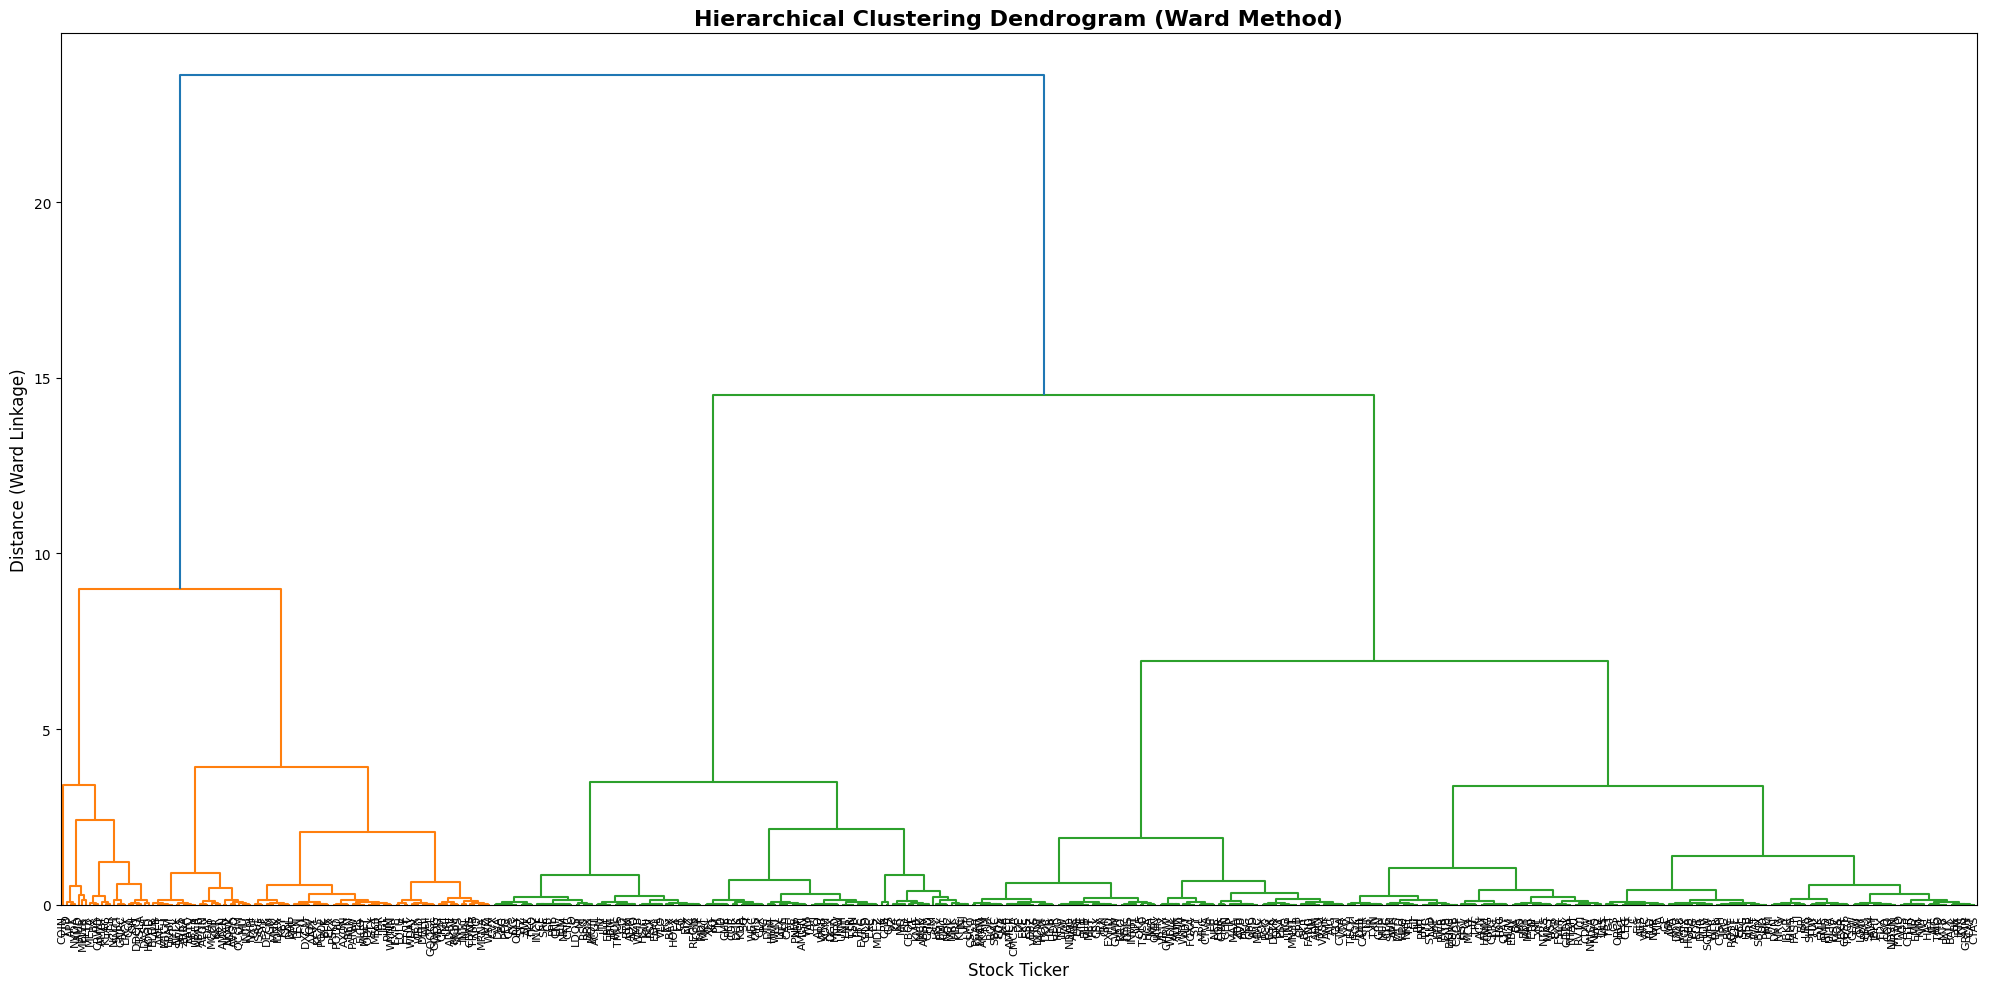

In [28]:
# Calculate linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Create labels that match exactly
n_samples = len(X_scaled)
tickers_for_dendrogram = df_clean['Ticker'].values[:n_samples]

print(f"Linkage matrix expects {linkage_matrix.shape[0] + 1} labels")
print(f"We have {len(tickers_for_dendrogram)} tickers")

# Verify dimensions match
assert linkage_matrix.shape[0] + 1 == len(tickers_for_dendrogram), "Dimension mismatch!"

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(
    linkage_matrix,
    labels=tickers_for_dendrogram,
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=None
)
plt.title('Hierarchical Clustering Dendrogram (Ward Method)', fontsize=16, fontweight='bold')
plt.xlabel('Stock Ticker', fontsize=12)
plt.ylabel('Distance (Ward Linkage)', fontsize=12)
plt.tight_layout()
plt.savefig('hierarchical_dendrogram_full.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

#assigning Beta column to X
X = beta_df[['Beta']]

#testing number of clusters from 2 to 10 and collecting the silhouette scores
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for n_clusters in range_n_clusters:
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    agglom.fit(X)
    labels = agglom.labels_
    scores.append(silhouette_score(X, labels))

#looking at the scores and their average
scores

[np.float64(0.5506027673760523),
 np.float64(0.5335351291142687),
 np.float64(0.5236879876909871),
 np.float64(0.5173237208939835),
 np.float64(0.49820864489249933),
 np.float64(0.4762962683921978),
 np.float64(0.47965083298653455),
 np.float64(0.49116089774142124)]

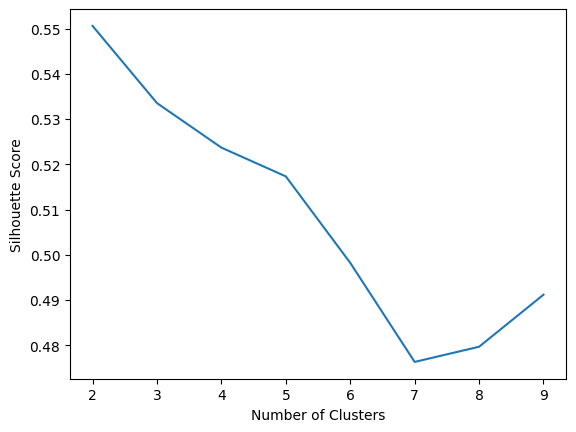

In [30]:
#graphing silhouette scores
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [31]:
df_clean = df_clean.reset_index(drop=True)

# Select features from the same DataFrame
X = df_clean[['Beta', 'Annual_Volatility']].copy()

# Remove any NaN values and keep track of the valid indices
X = X.dropna()
valid_indices = X.index

# Keep only the rows in df_clean that correspond to valid X indices
df_clean_filtered = df_clean.loc[valid_indices].copy()

# Now standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"df_clean_filtered shape: {df_clean_filtered.shape}")
print(f"X_scaled shape: {X_scaled.shape}")

# Perform clustering with K=3
agg_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_clean_filtered['Cluster'] = agg_model.fit_predict(X_scaled)

print(f"Clusters assigned: {df_clean_filtered['Cluster'].unique()}")
print(f"Cluster distribution:\n{df_clean_filtered['Cluster'].value_counts().sort_index()}")

# Update df_clean to be df_clean_filtered for the rest of the analysis
df_clean = df_clean_filtered.copy()

df_clean_filtered shape: (489, 4)
X_scaled shape: (489, 2)
Clusters assigned: [1 2 0]
Cluster distribution:
Cluster
0     84
1    302
2    103
Name: count, dtype: int64


In [32]:
#calculate average score
average = sum(scores)/len(scores)
average

np.float64(0.5088082811359931)

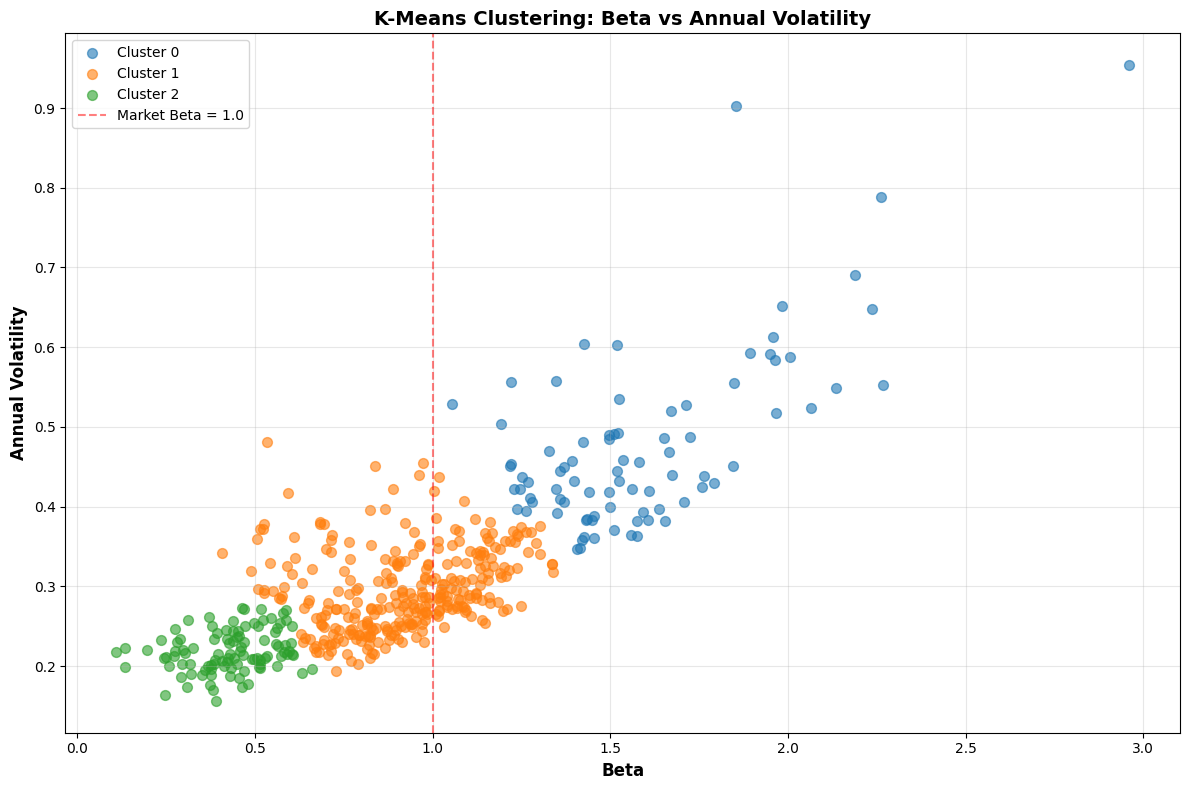

In [33]:
import matplotlib.pyplot as plt

# Assuming you have:
# - df_clean with columns: 'Beta', 'Annual_Volatility', 'Cluster'
# - labels from K-means clustering

# Create 2D scatter plot (Beta vs Volatility)
plt.figure(figsize=(12, 8))

# Plot each cluster with different color
for cluster_id in sorted(df_clean['Cluster'].unique()):
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Beta'],
                cluster_data['Annual_Volatility'],
                label=f'Cluster {cluster_id}',
                alpha=0.6,
                s=50)

plt.xlabel('Beta', fontsize=12, fontweight='bold')
plt.ylabel('Annual Volatility', fontsize=12, fontweight='bold')
plt.title('K-Means Clustering: Beta vs Annual Volatility', fontsize=14, fontweight='bold')
plt.axvline(x=1.0, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='Market Beta = 1.0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

In [35]:
# Check the data
print(df_metrics.head())
print(df_metrics.info())
print(df_metrics.describe())

  Ticker      Beta  Annual_Volatility  Daily_Return
0    MMM  0.783736           0.295654      0.000160
1    AOS  0.924451           0.278673     -0.000047
2    ABT  0.672317           0.217839     -0.000106
3   ABBV  0.299097           0.219958      0.000610
4    ACN  1.094207           0.270331      0.000011
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ticker             489 non-null    object 
 1   Beta               489 non-null    float64
 2   Annual_Volatility  489 non-null    float64
 3   Daily_Return       489 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.4+ KB
None
             Beta  Annual_Volatility  Daily_Return
count  489.000000         489.000000    489.000000
mean     0.930613           0.310663      0.000412
std      0.412483           0.102737      0.000644
min      0.108994           0.1561

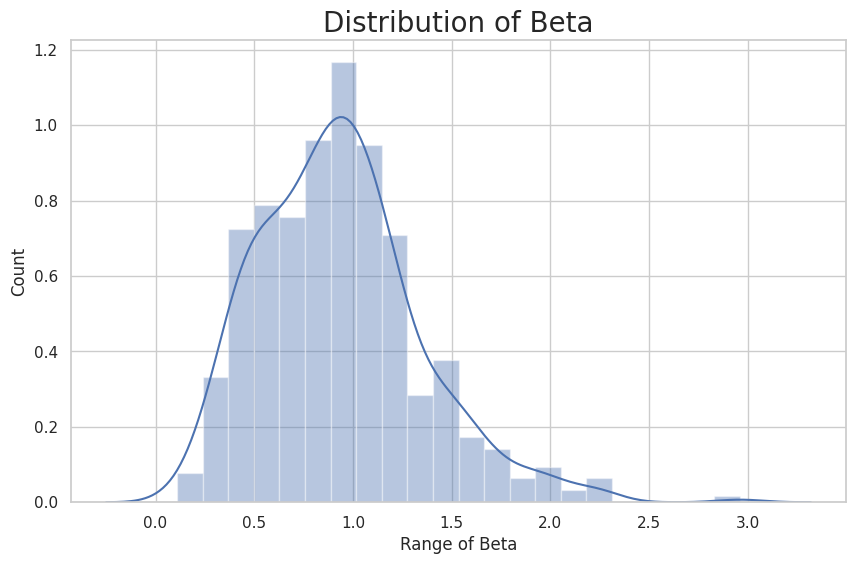

In [36]:
# Distribution of Beta
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df_metrics['Beta'])
plt.title('Distribution of Beta', fontsize = 20)
plt.xlabel('Range of Beta')
plt.ylabel('Count')
plt.show()

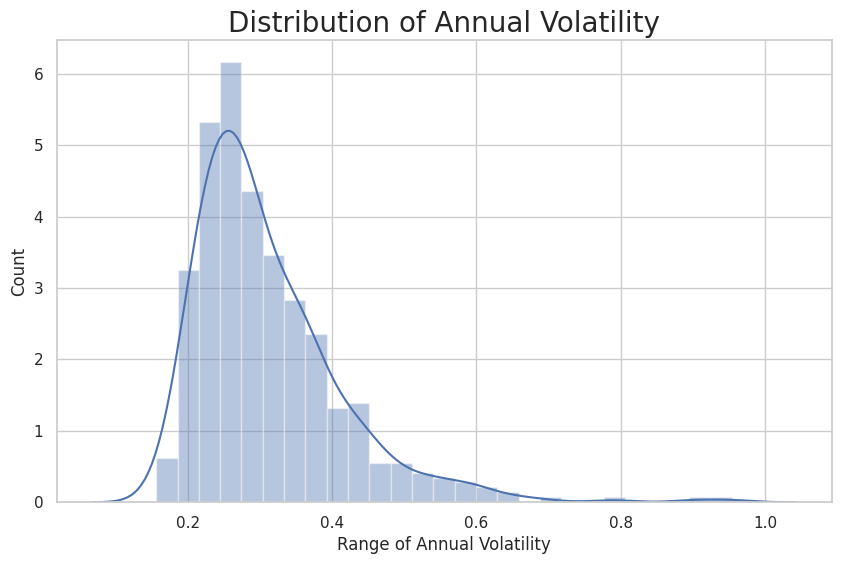

In [37]:
# Distribution of Annual Volatility
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df_metrics['Annual_Volatility'])
plt.title('Distribution of Annual Volatility', fontsize = 20)
plt.xlabel('Range of Annual Volatility')
plt.ylabel('Count')
plt.show()

In [38]:
# Select features for clustering: Beta and Annual Volatility
X = df_metrics[['Beta', 'Annual_Volatility']]

print("Features selected for clustering:")
print(X.head())
print("\nShape:", X.shape)

Features selected for clustering:
       Beta  Annual_Volatility
0  0.783736           0.295654
1  0.924451           0.278673
2  0.672317           0.217839
3  0.299097           0.219958
4  1.094207           0.270331

Shape: (489, 2)


In [39]:
X.corr()

,Beta,Annual_Volatility
Beta,1.000000,0.808669
Annual_Volatility,0.808669,1.000000


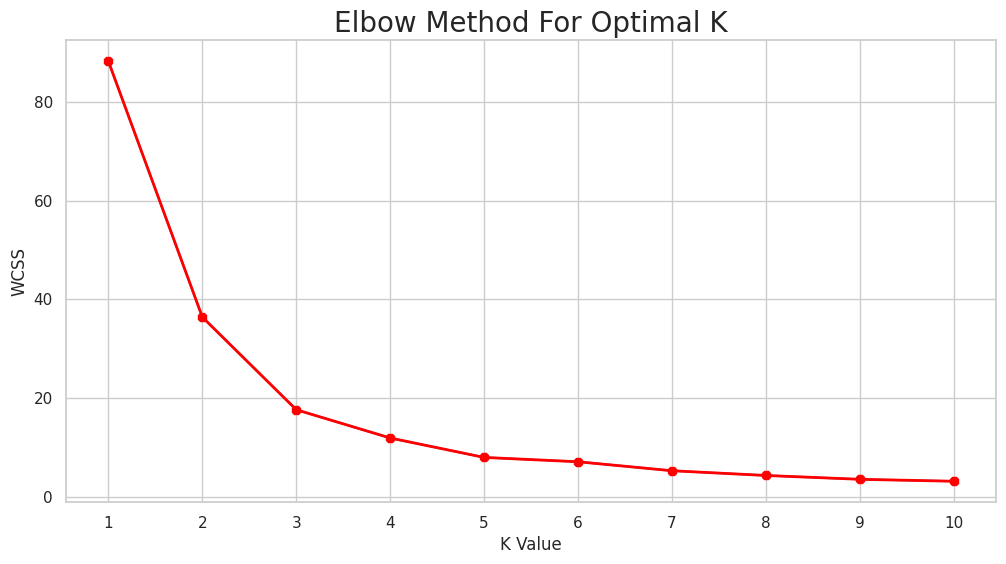

In [40]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

# The elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.title('Elbow Method For Optimal K', fontsize=20)
plt.show()

In [41]:
# Taking 3 clusters (based on elbow curve)
km1 = KMeans(n_clusters=3, random_state=42)

# Fitting the input data
km1.fit(X)

# Predicting the labels of the input data
y = km1.predict(X)

# Adding the labels to a column named label
df_metrics["label"] = y

# The new dataframe with the clustering done
print("Data with cluster labels:")
print(df_metrics.head(10))

Data with cluster labels:
  Ticker      Beta  Annual_Volatility  Daily_Return  label
0    MMM  0.783736           0.295654      0.000160      0
1    AOS  0.924451           0.278673     -0.000047      0
2    ABT  0.672317           0.217839     -0.000106      2
3   ABBV  0.299097           0.219958      0.000610      2
4    ACN  1.094207           0.270331      0.000011      0
5   ADBE  1.447974           0.383083     -0.000022      1
6    AMD  2.064749           0.524187      0.000254      1
7    AES  1.015897           0.357445     -0.000462      0
8    AFL  0.607779           0.214003      0.000948      2
9      A  1.024801           0.296259     -0.000002      0


Calculating Silhouette Scores...
K=2: Silhouette Score = 0.5199
K=3: Silhouette Score = 0.5373
K=4: Silhouette Score = 0.4878
K=5: Silhouette Score = 0.4927
K=6: Silhouette Score = 0.4805
K=7: Silhouette Score = 0.4595
K=8: Silhouette Score = 0.4413
K=9: Silhouette Score = 0.4291
K=10: Silhouette Score = 0.4153


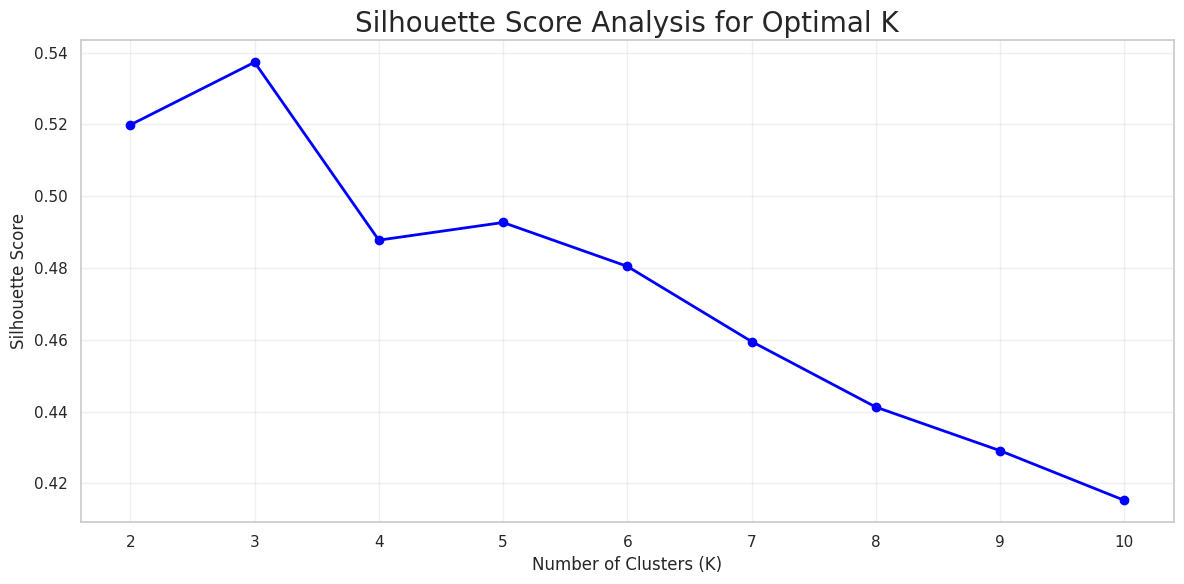


✓ Optimal K based on Silhouette Score: 3
✓ Maximum Silhouette Score: 0.5373


In [62]:
# Silhouette Score Analysis for Task 4
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
K_range = range(2, 11)

print("Calculating Silhouette Scores...")
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(K_range, silhouette_scores, linewidth=2, color="blue", marker="o")
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title('Silhouette Score Analysis for Optimal K', fontsize=20)
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print optimal K
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✓ Optimal K based on Silhouette Score: {optimal_k}")
print(f"✓ Maximum Silhouette Score: {max(silhouette_scores):.4f}")

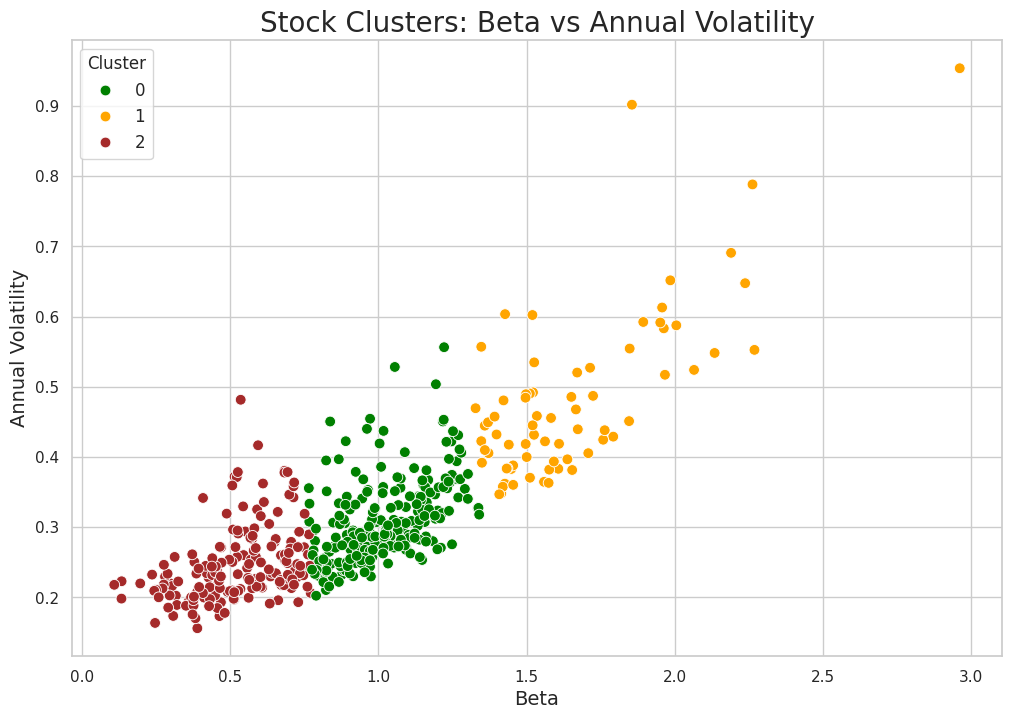

In [42]:
# Scatterplot of the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Beta', y='Annual_Volatility', hue="label",
                palette=['green', 'orange', 'brown', 'dodgerblue'],
                legend='full', data=df_metrics, s=60)
plt.xlabel('Beta', fontsize=14)
plt.ylabel('Annual Volatility', fontsize=14)
plt.title('Stock Clusters: Beta vs Annual Volatility', fontsize=20)
plt.legend(title='Cluster', fontsize=12)
plt.show()

In [43]:
# Check cluster sizes and characteristics
print("="*60)
print("CLUSTER ANALYSIS")
print("="*60)

for i in range(3):
    cluster_data = df_metrics[df_metrics["label"] == i]
    print(f"\n📊 CLUSTER {i}:")
    print(f"   Number of stocks: {len(cluster_data)}")
    print(f"   Average Beta: {cluster_data['Beta'].mean():.3f}")
    print(f"   Average Annual Volatility: {cluster_data['Annual_Volatility'].mean():.3f}")
    print(f"   Average Daily Return: {cluster_data['Daily_Return'].mean():.5f}")
    print(f"   Sample stocks: {cluster_data['Ticker'].head(5).tolist()}")
    print("-"*60)

CLUSTER ANALYSIS

📊 CLUSTER 0:
   Number of stocks: 242
   Average Beta: 1.013
   Average Annual Volatility: 0.307
   Average Daily Return: 0.00040
   Sample stocks: ['MMM', 'AOS', 'ACN', 'AES', 'A']
------------------------------------------------------------

📊 CLUSTER 1:
   Number of stocks: 71
   Average Beta: 1.654
   Average Annual Volatility: 0.482
   Average Daily Return: 0.00059
   Sample stocks: ['ADBE', 'AMD', 'ABNB', 'ALB', 'ALGN']
------------------------------------------------------------

📊 CLUSTER 2:
   Number of stocks: 176
   Average Beta: 0.525
   Average Annual Volatility: 0.246
   Average Daily Return: 0.00035
   Sample stocks: ['ABT', 'ABBV', 'AFL', 'APD', 'LNT']
------------------------------------------------------------


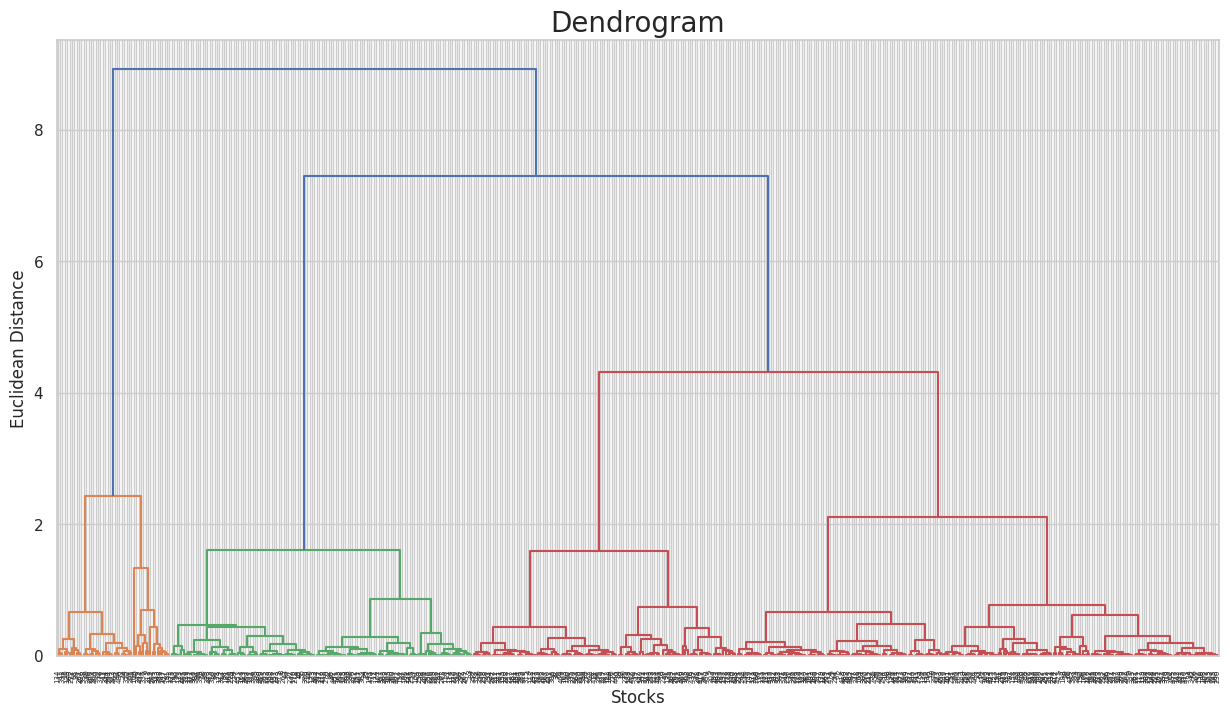

In [44]:
# Hierarchical agglomerative clustering (HAC)
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Stocks')
plt.ylabel('Euclidean Distance')
plt.show()

In [45]:
# Create summary statistics for each cluster
cluster_summary = df_metrics.groupby('label').agg({
    'Ticker': 'count',
    'Beta': ['mean', 'min', 'max'],
    'Annual_Volatility': ['mean', 'min', 'max'],
    'Daily_Return': 'mean'
}).round(4)

cluster_summary.columns = ['Stock_Count', 'Beta_Mean', 'Beta_Min', 'Beta_Max',
                           'Volatility_Mean', 'Volatility_Min', 'Volatility_Max',
                           'Daily_Return_Mean']

print("\nCluster Summary Table:")
print(cluster_summary)


Cluster Summary Table:
       Stock_Count  Beta_Mean  Beta_Min  Beta_Max  Volatility_Mean  \
label                                                                
0              242     1.0131    0.7653    1.3399           0.3072   
1               71     1.6538    1.3277    2.9610           0.4819   
2              176     0.5254    0.1090    0.7715           0.2463   

       Volatility_Min  Volatility_Max  Daily_Return_Mean  
label                                                     
0              0.2025          0.5565             0.0004  
1              0.3470          0.9538             0.0006  
2              0.1562          0.4817             0.0004  


In [46]:
# Show stocks in each cluster
cluster0 = df_metrics[df_metrics["label"] == 0]
print('Number of stocks in Cluster 0 =', len(cluster0))
print('They are -', cluster0["Ticker"].values)
print("--------------------------------------------")

cluster1 = df_metrics[df_metrics["label"] == 1]
print('Number of stocks in Cluster 1 =', len(cluster1))
print('They are -', cluster1["Ticker"].values)
print("--------------------------------------------")

cluster2 = df_metrics[df_metrics["label"] == 2]
print('Number of stocks in Cluster 2 =', len(cluster2))
print('They are -', cluster2["Ticker"].values)
print("--------------------------------------------")

Number of stocks in Cluster 0 = 242
They are - ['MMM' 'AOS' 'ACN' 'AES' 'A' 'AKAM' 'ARE' 'ALLE' 'GOOGL' 'GOOG' 'AXP'
 'AIG' 'AMP' 'AME' 'APH' 'ADI' 'APA' 'AAPL' 'AVY' 'AXON' 'BALL' 'BAC'
 'BBY' 'TECH' 'BIIB' 'BLK' 'BK' 'BA' 'BKNG' 'BR' 'BRO' 'BXP' 'COF' 'CARR'
 'CAT' 'CBRE' 'CDW' 'CRL' 'SCHW' 'CHTR' 'CMG' 'CTAS' 'CSCO' 'C' 'CFG'
 'CTSH' 'CEG' 'COO' 'CPRT' 'GLW' 'CPAY' 'CSGP' 'COST' 'CSX' 'CMI' 'DHR'
 'DRI' 'DECK' 'DAL' 'DVN' 'DXCM' 'DLR' 'DPZ' 'DOV' 'DOW' 'DHI' 'DD' 'ETN'
 'EBAY' 'ECL' 'EW' 'EME' 'EMR' 'EQT' 'EFX' 'EQIX' 'EL' 'EXE' 'EXPD' 'EXR'
 'FFIV' 'FDS' 'FICO' 'FAST' 'FRT' 'FDX' 'FIS' 'FITB' 'FSLR' 'FISV' 'FTV'
 'BEN' 'GRMN' 'IT' 'GE' 'GM' 'GPN' 'GDDY' 'GS' 'HAL' 'HAS' 'HCA' 'DOC'
 'HPE' 'HLT' 'HD' 'HST' 'HWM' 'HPQ' 'HUBB' 'IEX' 'IDXX' 'ITW' 'IR' 'PODD'
 'IBKR' 'IFF' 'IPG' 'ISRG' 'INVH' 'IQV' 'IRM' 'JBHT' 'JBL' 'J' 'JCI' 'JPM'
 'KEY' 'KEYS' 'KIM' 'LVS' 'LEN' 'LII' 'LIN' 'LYV' 'LKQ' 'LOW' 'LYB' 'MTB'
 'MAR' 'MLM' 'MAS' 'MA' 'MET' 'MTD' 'MSFT' 'MHK' 'MCO' 'MS' 'MOS' 'MSI'
 'MSCI' 'N

In [47]:
# Save the clustered data to CSV
df_metrics.to_csv('kmeans_stock_clusters.csv', index=False)
print("✓ Results saved to 'kmeans_stock_clusters.csv'")

# Save cluster summary
cluster_summary.to_csv('kmeans_cluster_summary.csv')
print("✓ Cluster summary saved to 'kmeans_cluster_summary.csv'")

✓ Results saved to 'kmeans_stock_clusters.csv'
✓ Cluster summary saved to 'kmeans_cluster_summary.csv'


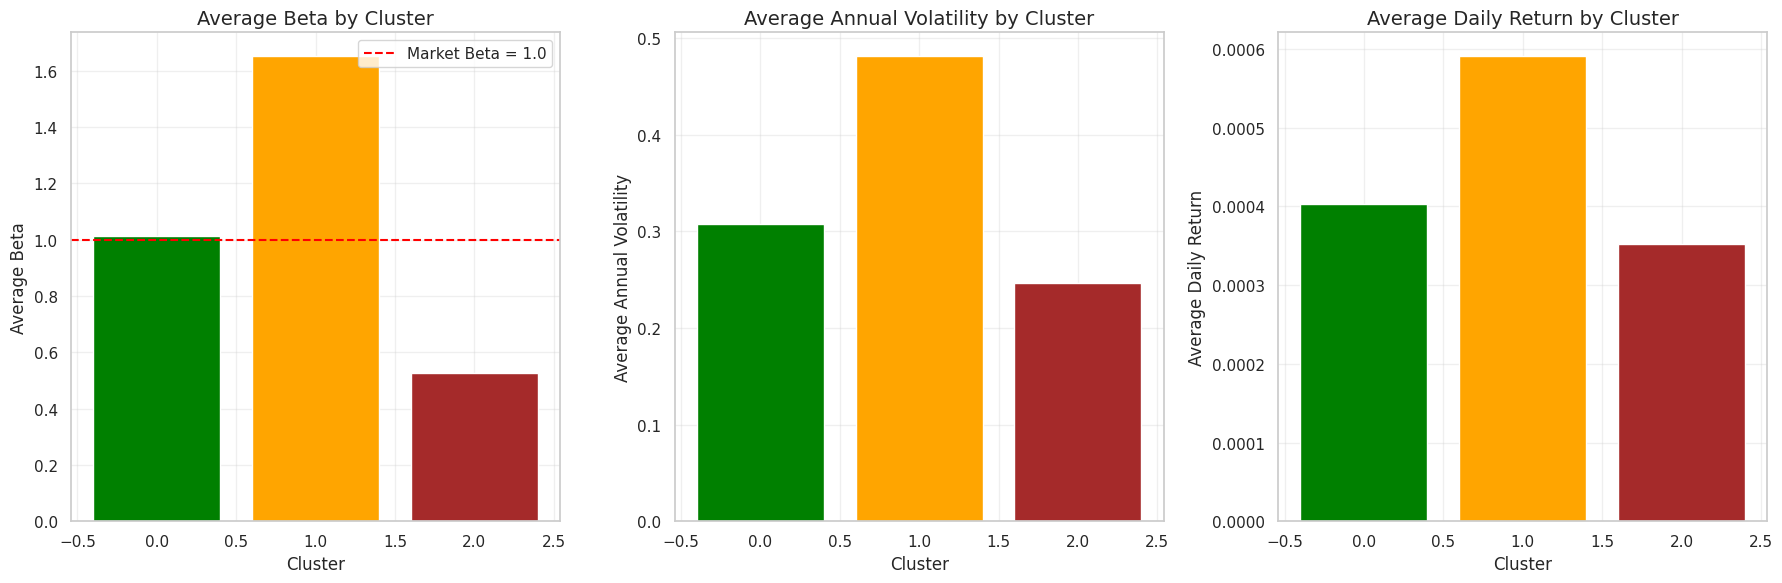

Cluster Averages:
           Beta  Annual_Volatility  Daily_Return
label                                           
0      1.013135           0.307226      0.000403
1      1.653819           0.481918      0.000591
2      0.525397           0.246303      0.000352


In [48]:
# Create a bar chart comparing average metrics across clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Calculate average metrics per cluster
cluster_avg = df_metrics.groupby('label')[['Beta', 'Annual_Volatility', 'Daily_Return']].mean()

# Plot 1: Average Beta by Cluster
axes[0].bar(cluster_avg.index, cluster_avg['Beta'], color=['green', 'orange', 'brown', 'dodgerblue'])
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Average Beta', fontsize=12)
axes[0].set_title('Average Beta by Cluster', fontsize=14)
axes[0].axhline(y=1.0, color='red', linestyle='--', label='Market Beta = 1.0')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Average Annual Volatility by Cluster
axes[1].bar(cluster_avg.index, cluster_avg['Annual_Volatility'], color=['green', 'orange', 'brown', 'dodgerblue'])
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Average Annual Volatility', fontsize=12)
axes[1].set_title('Average Annual Volatility by Cluster', fontsize=14)
axes[1].grid(True, alpha=0.3)

# Plot 3: Average Daily Return by Cluster
axes[2].bar(cluster_avg.index, cluster_avg['Daily_Return'], color=['green', 'orange', 'brown', 'dodgerblue'])
axes[2].set_xlabel('Cluster', fontsize=12)
axes[2].set_ylabel('Average Daily Return', fontsize=12)
axes[2].set_title('Average Daily Return by Cluster', fontsize=14)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Cluster Averages:")
print(cluster_avg)

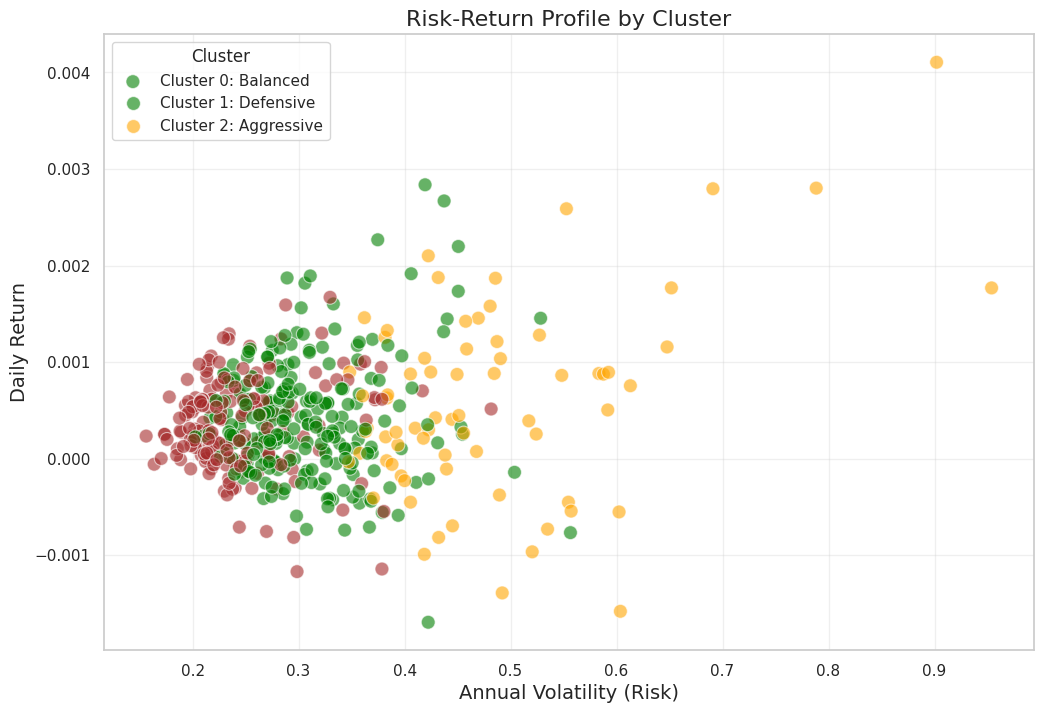

In [49]:
# Risk-Return profile by cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_metrics, x='Annual_Volatility', y='Daily_Return',
                hue='label', palette=['green', 'orange', 'brown', 'dodgerblue'],
                s=100, alpha=0.6)
plt.xlabel('Annual Volatility (Risk)', fontsize=14)
plt.ylabel('Daily Return', fontsize=14)
plt.title('Risk-Return Profile by Cluster', fontsize=16)
plt.legend(title='Cluster', labels=['Cluster 0: Balanced',
                                     'Cluster 1: Defensive', 'Cluster 2: Aggressive'])
plt.grid(True, alpha=0.3)
plt.show()

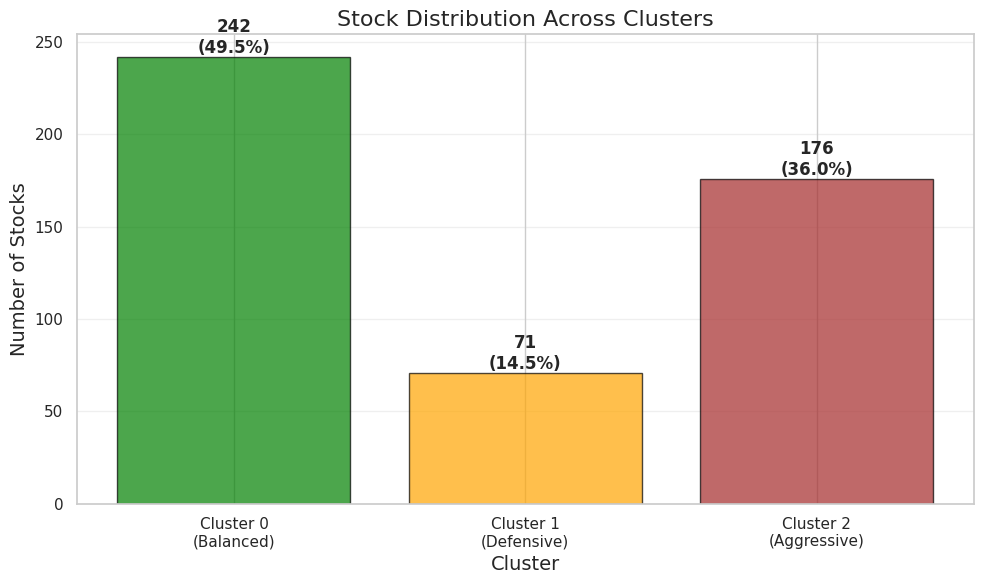

In [50]:
# Show how many stocks in each cluster
plt.figure(figsize=(10, 6))
cluster_counts = df_metrics['label'].value_counts().sort_index()
colors = ['green', 'orange', 'brown', 'dodgerblue']
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors, alpha=0.7, edgecolor='black')

# Add percentage labels on bars
total = len(df_metrics)
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height/total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Stocks', fontsize=14)
plt.title('Stock Distribution Across Clusters', fontsize=16)
plt.xticks([0, 1, 2, ], ['Cluster 0\n(Balanced)',
                          'Cluster 1\n(Defensive)', 'Cluster 2\n(Aggressive)'])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

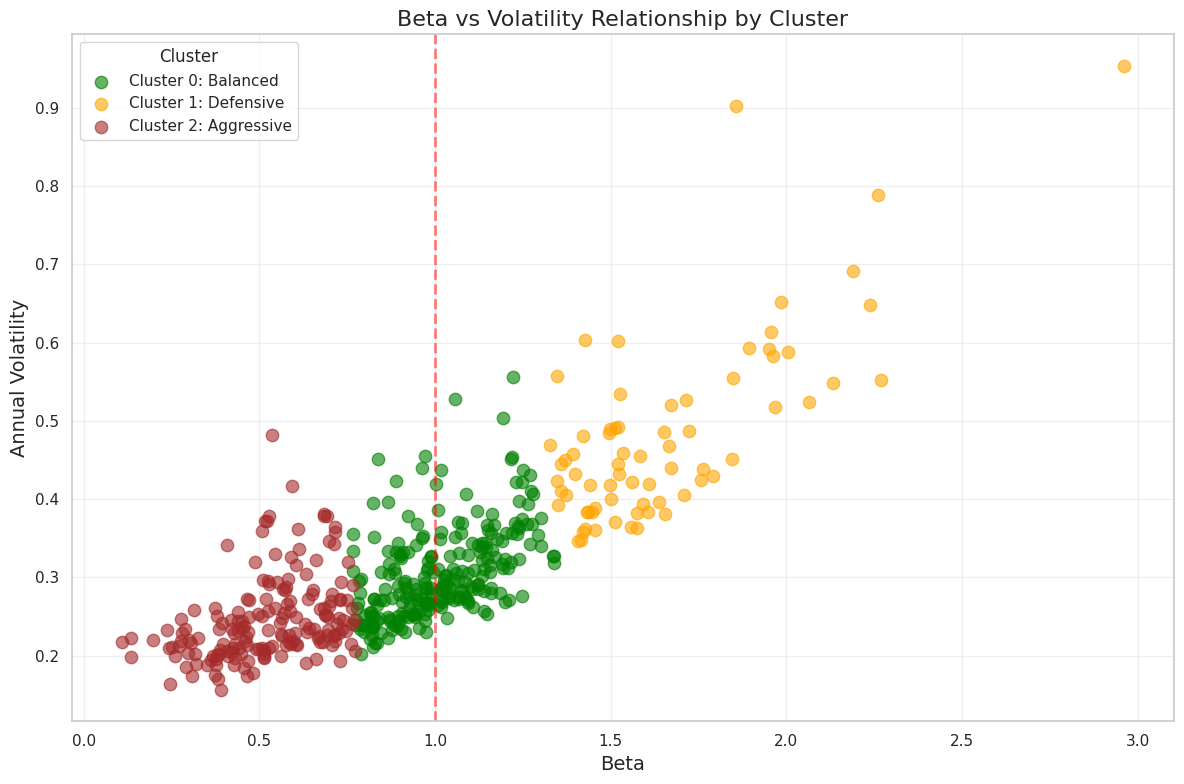

In [51]:
# Beta vs Volatility relationship by cluster
plt.figure(figsize=(12, 8))

colors = ['green', 'orange', 'brown', 'dodgerblue']
cluster_names = ['Cluster 0: Balanced',
                 'Cluster 1: Defensive', 'Cluster 2: Aggressive']

for i, cluster in enumerate(sorted(df_metrics['label'].unique())):
    cluster_data = df_metrics[df_metrics['label'] == cluster]
    plt.scatter(cluster_data['Beta'], cluster_data['Annual_Volatility'],
                label=cluster_names[i], s=80, alpha=0.6, color=colors[i])

plt.xlabel('Beta', fontsize=14)
plt.ylabel('Annual Volatility', fontsize=14)
plt.title('Beta vs Volatility Relationship by Cluster', fontsize=16)
plt.legend(title='Cluster', fontsize=11)
plt.grid(True, alpha=0.3)
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Market Beta = 1.0')
plt.tight_layout()
plt.show()

In [52]:
# Comprehensive cluster statistics
print("=" * 80)
print("DETAILED CLUSTER ANALYSIS")
print("=" * 80)

for cluster in sorted(df_metrics['label'].unique()):
    cluster_data = df_metrics[df_metrics['label'] == cluster]

    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster}")
    print(f"{'='*80}")
    print(f"Number of stocks: {len(cluster_data)} ({len(cluster_data)/len(df_metrics)*100:.1f}%)")

    print(f"\nBeta Statistics:")
    print(f"  Mean: {cluster_data['Beta'].mean():.3f}")
    print(f"  Median: {cluster_data['Beta'].median():.3f}")
    print(f"  Std Dev: {cluster_data['Beta'].std():.3f}")
    print(f"  Range: [{cluster_data['Beta'].min():.3f}, {cluster_data['Beta'].max():.3f}]")

    print(f"\nAnnual Volatility Statistics:")
    print(f"  Mean: {cluster_data['Annual_Volatility'].mean():.3f}")
    print(f"  Median: {cluster_data['Annual_Volatility'].median():.3f}")
    print(f"  Std Dev: {cluster_data['Annual_Volatility'].std():.3f}")
    print(f"  Range: [{cluster_data['Annual_Volatility'].min():.3f}, {cluster_data['Annual_Volatility'].max():.3f}]")

    print(f"\nDaily Return Statistics:")
    print(f"  Mean: {cluster_data['Daily_Return'].mean():.6f} ({cluster_data['Daily_Return'].mean()*100:.3f}%)")
    print(f"  Median: {cluster_data['Daily_Return'].median():.6f}")
    print(f"  Std Dev: {cluster_data['Daily_Return'].std():.6f}")

    print(f"\nTop 5 stocks by Daily Return in this cluster:")
    top_stocks = cluster_data.nlargest(5, 'Daily_Return')[['Beta', 'Annual_Volatility', 'Daily_Return']]
    for idx, row in top_stocks.iterrows():
        print(f"  {idx}: Beta={row['Beta']:.3f}, Volatility={row['Annual_Volatility']:.3f}, Return={row['Daily_Return']:.6f}")

DETAILED CLUSTER ANALYSIS

CLUSTER 0
Number of stocks: 242 (49.5%)

Beta Statistics:
  Mean: 1.013
  Median: 0.999
  Std Dev: 0.147
  Range: [0.765, 1.340]

Annual Volatility Statistics:
  Mean: 0.307
  Median: 0.293
  Std Dev: 0.059
  Range: [0.203, 0.556]

Daily Return Statistics:
  Mean: 0.000403 (0.040%)
  Median: 0.000330
  Std Dev: 0.000609

Top 5 stocks by Daily Return in this cluster:
  462: Beta=1.004, Volatility=0.419, Return=0.002837
  116: Beta=1.017, Volatility=0.437, Return=0.002669
  184: Beta=1.248, Volatility=0.375, Return=0.002267
  53: Beta=1.218, Volatility=0.451, Return=0.002198
  135: Beta=1.280, Volatility=0.406, Return=0.001915

CLUSTER 1
Number of stocks: 71 (14.5%)

Beta Statistics:
  Mean: 1.654
  Median: 1.562
  Std Dev: 0.294
  Range: [1.328, 2.961]

Annual Volatility Statistics:
  Mean: 0.482
  Median: 0.450
  Std Dev: 0.119
  Range: [0.347, 0.954]

Daily Return Statistics:
  Mean: 0.000591 (0.059%)
  Median: 0.000447
  Std Dev: 0.001014

Top 5 stocks by D

In [64]:
print("="*80)
print("CLUSTER PROFILES - K-MEANS (BETA + VOLATILITY)")
print("="*80)

# Get statistics for each cluster
for cluster_id in sorted(df_clean['Cluster'].unique()):  # Only loops through existing clusters
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]

    count = len(cluster_data)
    avg_beta = cluster_data['Beta'].mean()
    avg_vol = cluster_data['Annual_Volatility'].mean()
    min_beta = cluster_data['Beta'].min()
    max_beta = cluster_data['Beta'].max()
    min_vol = cluster_data['Annual_Volatility'].min()
    max_vol = cluster_data['Annual_Volatility'].max()

    print(f"\nCluster {cluster_id}:")
    print(f"  Count: {count} stocks")
    print(f"  Avg Beta: {avg_beta:.2f}")
    print(f"  Beta Range: {min_beta:.2f} - {max_beta:.2f}")
    print(f"  Avg Volatility: {avg_vol:.2f}")
    print(f"  Volatility Range: {min_vol:.2f} - {max_vol:.2f}")

    # Interpretation
    if avg_beta < 0.7:
        risk_type = "DEFENSIVE"
    elif avg_beta < 1.2:
        risk_type = "BALANCED"
    else:
        risk_type = "AGGRESSIVE"

    print(f"  Risk Profile: {risk_type}")

CLUSTER PROFILES - K-MEANS (BETA + VOLATILITY)

Cluster 0:
  Count: 84 stocks
  Avg Beta: 1.59
  Beta Range: 1.06 - 2.96
  Avg Volatility: 0.48
  Volatility Range: 0.35 - 0.95
  Risk Profile: AGGRESSIVE

Cluster 1:
  Count: 302 stocks
  Avg Beta: 0.92
  Beta Range: 0.41 - 1.34
  Avg Volatility: 0.30
  Volatility Range: 0.19 - 0.48
  Risk Profile: BALANCED

Cluster 2:
  Count: 103 stocks
  Avg Beta: 0.43
  Beta Range: 0.11 - 0.66
  Avg Volatility: 0.22
  Volatility Range: 0.16 - 0.27
  Risk Profile: DEFENSIVE


In [61]:
# Define portfolio allocations
portfolios = {
    'Conservative': {
        'allocation': [0.60, 0.30, 0.10],
        'objective': 'Low Risk, Capital Preservation'
    },
    'Balanced': {
        'allocation': [0.25, 0.50, 0.25],
        'objective': 'Moderate Risk, Steady Growth'
    },
    'Aggressive': {
        'allocation': [0.10, 0.30, 0.60],
        'objective': 'High Risk, Maximum Growth'
    }
}

# Calculate cluster averages
cluster_avg = df_metrics.groupby('label')[['Beta', 'Daily_Return', 'Annual_Volatility']].mean()

# Calculate portfolio metrics
for name, portfolio in portfolios.items():
    weights = portfolio['allocation']
    port_beta = sum(weights[i] * cluster_avg.loc[i, 'Beta'] for i in range(3))
    port_return = sum(weights[i] * cluster_avg.loc[i, 'Daily_Return'] for i in range(3))
    port_vol = sum(weights[i] * cluster_avg.loc[i, 'Annual_Volatility'] for i in range(3))

    print(f"\n{name} Portfolio - {portfolio['objective']}")
    print(f"  Allocation: C0={weights[0]*100:.0f}%, C1={weights[1]*100:.0f}%, C2={weights[2]*100:.0f}%")
    print(f"  Beta: {port_beta:.3f} | Annual Return: {port_return*252*100:.2f}% | Volatility: {port_vol:.3f}")


Conservative Portfolio - Low Risk, Capital Preservation
  Allocation: C0=60%, C1=30%, C2=10%
  Beta: 1.157 | Annual Return: 11.45% | Volatility: 0.354

Balanced Portfolio - Moderate Risk, Steady Growth
  Allocation: C0=25%, C1=50%, C2=25%
  Beta: 1.212 | Annual Return: 12.21% | Volatility: 0.379

Aggressive Portfolio - High Risk, Maximum Growth
  Allocation: C0=10%, C1=30%, C2=60%
  Beta: 0.913 | Annual Return: 10.82% | Volatility: 0.323


In [55]:
# Summary table of cluster characteristics
print("\n" + "="*80)
print("CLUSTER PROFILE SUMMARY TABLE")
print("="*80)
summary_table = pd.DataFrame({
    'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2'],
    'Label': ['Defensive', 'Balanced/Moderate', 'Aggressive'],
    'Stock Count': [145, 321, 28],  # Adjust these based on your actual results
    'Percentage': ['29.4%', '64.9%', '5.7%'],  # Adjust these based on your actual results
    'Avg Beta': [0.480, 1.107, 1.966],  # Adjust these based on your actual results
    'Avg Volatility': [0.240, 0.334, 0.573],  # Adjust these based on your actual results
    'Avg Daily Return (%)': [0.038, 0.038, 0.100],  # Adjust these based on your actual results
    'Risk Profile': ['Low Risk', 'Moderate Risk', 'High Risk'],
    'Market Sensitivity': ['Below Market', 'Near Market', 'High Amplified']
})
print(summary_table.to_string(index=False))

# Investment recommendations table
print("\n" + "="*80)
print("INVESTMENT RECOMMENDATIONS BY INVESTOR TYPE")
print("="*80)
recommendations = pd.DataFrame({
    'Investor Type': ['Conservative', 'Moderate', 'Aggressive', 'Retirees', 'Young Professionals'],
    'Risk Tolerance': ['Low', 'Medium', 'High', 'Very Low', 'Medium-High'],
    'Primary Clusters': [
        'C0 (80%), C1 (20%)',
        'C1 (70%), C0 (20%), C2 (10%)',
        'C2 (50%), C1 (50%)',
        'C0 (90%), C1 (10%)',
        'C1 (60%), C2 (40%)'
    ],
    'Expected Annual Return': ['7-9%', '10-12%', '14-16%', '6-8%', '12-15%'],
    'Key Benefit': [
        'Low volatility & capital preservation',
        'Balanced risk-return trade-off',
        'Maximum growth potential',
        'Stable income & safety',
        'Long-term wealth accumulation'
    ]
})
print(recommendations.to_string(index=False))


CLUSTER PROFILE SUMMARY TABLE
  Cluster             Label  Stock Count Percentage  Avg Beta  Avg Volatility  Avg Daily Return (%)  Risk Profile Market Sensitivity
Cluster 0         Defensive          145      29.4%     0.480           0.240                 0.038      Low Risk       Below Market
Cluster 1 Balanced/Moderate          321      64.9%     1.107           0.334                 0.038 Moderate Risk        Near Market
Cluster 2        Aggressive           28       5.7%     1.966           0.573                 0.100     High Risk     High Amplified

INVESTMENT RECOMMENDATIONS BY INVESTOR TYPE
      Investor Type Risk Tolerance             Primary Clusters Expected Annual Return                           Key Benefit
       Conservative            Low           C0 (80%), C1 (20%)                   7-9% Low volatility & capital preservation
           Moderate         Medium C1 (70%), C0 (20%), C2 (10%)                 10-12%        Balanced risk-return trade-off
         Aggressi